Install MONAI Deploy App SDK and dependencies

In [ ]:
%pip install -r prostate_mri_lesion_seg_app/requirements.txt

Download models and test data

In [2]:
# Download the following folder (ProstateX-0004) and place in test-data/
# https://drive.google.com/drive/folders/1besSncSLlbeiv7UWveRJoOYQXOzu3JkU?usp=drive_link

# Download the following folder of models and place in prostate_lesion_seg_app/models
# https://drive.google.com/drive/folders/1EpjrlzEdV7CcaCYqGTIEzOapamP4Ag6M?usp=drive_link

Test application locally (non-containerized)

In [ ]:
%%bash

./scripts/test_local.sh -i test-data/ProstateX-0004/ -o output/ -m prostate_mri_lesion_seg_app/models/

Build the `lesion_seg_workflow_app` container, i.e., the MONAI Application Package (MAP). This may take more than 15 minutes during the initial build.

In [ ]:
# Package code into MAP
APP_DIR="prostate_mri_lesion_seg_app"
MODEL_DIR=APP_DIR + "/models"
!monai-deploy package $APP_DIR -l DEBUG -t lesion_seg_workflow_app -m $MODEL_DIR -c $APP_DIR/app.yaml --platform x64-workstation

In [4]:
%%bash

monai-deploy run lesion_seg_workflow_app-x64-workstation-dgpu-linux-amd64:1.0 -i test-data/ProstateX-0004/ -o output/

[2025-03-10 15:30:48,718] [INFO] (runner) - Checking dependencies...
[2025-03-10 15:30:48,718] [INFO] (runner) - --> Verifying if "docker" is installed...

[2025-03-10 15:30:48,718] [INFO] (runner) - --> Verifying if "docker-buildx" is installed...

[2025-03-10 15:30:48,718] [INFO] (runner) - --> Verifying if "lesion_seg_workflow_app-x64-workstation-dgpu-linux-amd64:1.0" is available...

[2025-03-10 15:30:48,745] [INFO] (runner) - Reading HAP/MAP manifest...


e78bc1d0b1626d397f0a117855e31d21940746a6ed6179747baaaab9b200281f


[2025-03-10 15:30:51,406] [INFO] (runner) - --> Verifying if "nvidia-ctk" is installed...

[2025-03-10 15:30:51,406] [INFO] (runner) - --> Verifying "nvidia-ctk" version...

[2025-03-10 15:30:53,579] [INFO] (common) - Launching container (3baab5796e76) using image 'lesion_seg_workflow_app-x64-workstation-dgpu-linux-amd64:1.0'...
    container name:      nervous_dijkstra
    host name:           8038Kidwell
    network:             host
    user:                1000:1000
    ulimits:             memlock=-1:-1, stack=67108864:67108864
    cap_add:             CAP_SYS_PTRACE
    ipc mode:            host
    shared memory size:  67108864
    devices:             
    group_add:           44


2025-03-10 19:30:54 [INFO] Launching application python3 /opt/holoscan/app ...

[info] [fragment.cpp:599] Loading extensions from configs...

[info] [gxf_executor.cpp:264] Creating context

[2025-03-10 19:30:56,858] [INFO] (root) - Parsed args: Namespace(log_level=None, input=None, output=None, model=None, workdir=None, argv=['/opt/holoscan/app'])

[2025-03-10 19:30:56,860] [INFO] (root) - AppContext object: AppContext(input_path=/var/holoscan/input, output_path=/var/holoscan/output, model_path=/opt/holoscan/models, workdir=/var/holoscan)

[2025-03-10 19:30:56,860] [INFO] (app.AIProstateLesionSegApp) - App input and output path: /var/holoscan/input, /var/holoscan/output

[info] [gxf_executor.cpp:1797] creating input IOSpec named 'input_folder'

[info] [gxf_executor.cpp:1797] creating input IOSpec named 'dicom_study_list'

[info] [gxf_executor.cpp:1797] creating input IOSpec named 'dicom_study_list'

[info] [gxf_executor.cpp:1797] creating input IOSpec named 'dicom_study_list'

[info] [

[2025-03-10 15:31:18,706] [INFO] (common) - Container 'nervous_dijkstra'(3baab5796e76) exited.


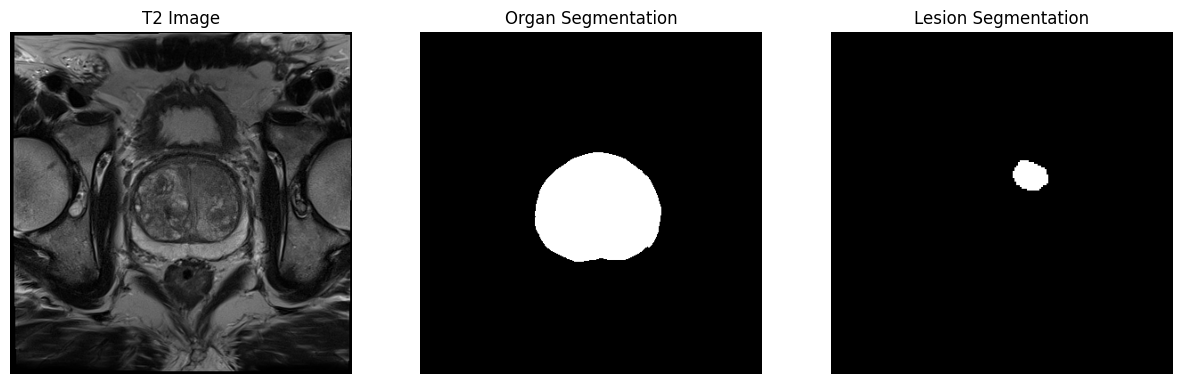

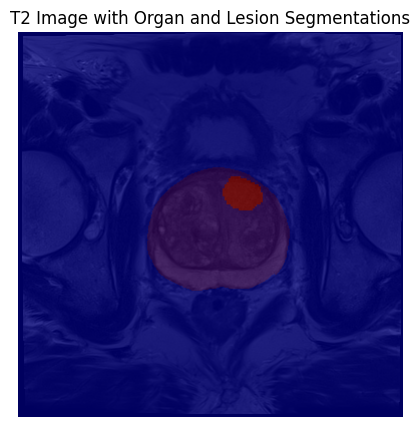

In [5]:
# Load and display the output nifti segmentation on top of the t2 image
import os
import nibabel as nib
import matplotlib.pyplot as plt

t2_img = nib.load(os.path.join("output", "t2/t2.nii.gz"))
organ_seg = nib.load(os.path.join("output", "organ/organ.nii.gz"))
lesion_seg = nib.load(os.path.join("output", "lesion/lesion_mask.nii.gz"))

t2_data = t2_img.get_fdata()
organ_data = organ_seg.get_fdata()
lesion_data = lesion_seg.get_fdata()

# Plot the t2 image, organ segmentation and lesion segmentation
slice = t2_data.shape[2] // 2
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(t2_data[:, :, slice].T, cmap="gray")
plt.title("T2 Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(organ_data[:, :, slice].T, cmap="gray")
plt.title("Organ Segmentation")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(lesion_data[:, :, slice].T, cmap="gray")
plt.title("Lesion Segmentation")
plt.axis("off")

plt.show()

# Create a single image with all the segmentations
plt.figure(figsize=(5, 5))
plt.imshow(t2_data[:, :, slice].T, cmap="gray")
plt.imshow(organ_data[:, :, slice].T, cmap="jet", alpha=0.5)
plt.imshow(lesion_data[:, :, slice].T, cmap="jet", alpha=0.5)
plt.title("T2 Image with Organ and Lesion Segmentations")
plt.axis("off")
plt.show()
